In [7]:
import gym
import pandas as pd
import numpy as np
import cv2
import random
import csv
import os
from tqdm.auto import tqdm

C:\Users\Sai Madhavan G\AppData\Local\Temp\ipykernel_17228\926801806.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
def create_ds(name, num, dir):
    gym.envs
    env = gym.make("CartPole-v1", render_mode = "rgb_array")
    env.reset()
    f = open(f"{dir}/{name}.csv", "w", newline='')
    writer = csv.writer(f, )
    writer.writerow(['path', 'pos', 'ang'])
    os.mkdir(os.path.join(dir, name))
    for i in tqdm(range(num)):
        pos = random.uniform(-2.4, 2.4)
        ang = random.uniform(-0.2095, 0.2095)
        env.unwrapped.state = np.array([pos, 0, ang, 0])
        img = env.render()
        path =  f"{name}/{i}.png"
        cv2.imwrite(dir + '/' + path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        pos /= 2.4
        ang /= 0.2095
        writer.writerow([path, pos, ang])
    f.close()
    

In [11]:
create_ds("train", 20000, "dataset")

  0%|          | 0/20000 [00:00<?, ?it/s]

array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'ang'}>]],
      dtype=object)

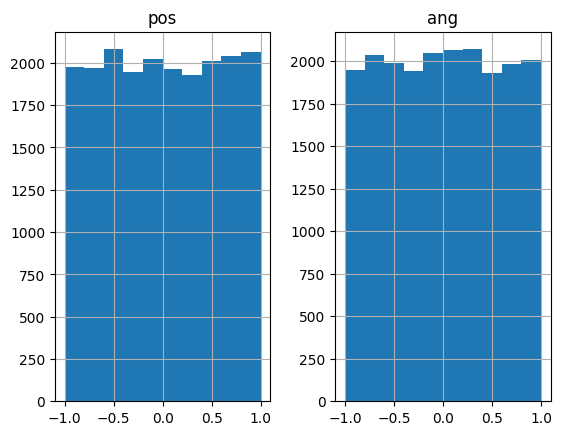

In [12]:
train = pd.read_csv("./dataset/train.csv")
train.hist(['pos', 'ang'])

In [13]:
create_ds("test", 5000, "dataset")

  0%|          | 0/5000 [00:00<?, ?it/s]

array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'ang'}>]],
      dtype=object)

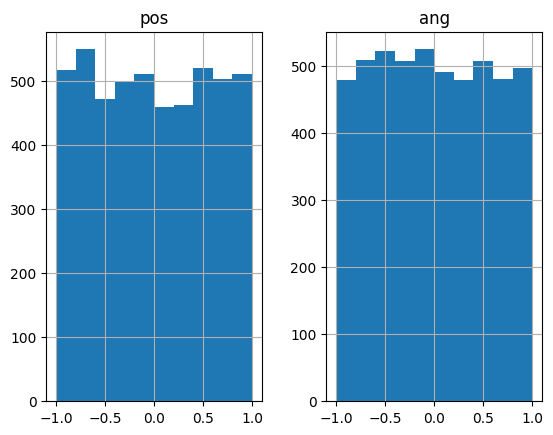

In [14]:
test = pd.read_csv("./dataset/test.csv")
test.hist(['pos', 'ang'])

In [22]:
from torch.utils.data import Dataset, DataLoader
import torch
from skimage import io

In [31]:
class CartPoleDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        image = io.imread(img_name)
        labels = self.df.iloc[idx, 1:]
        labels = np.array(labels, dtype=float)
        sample = {'image': image, 'label': labels}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [32]:
ds = CartPoleDataset("./dataset/train.csv", "./dataset")

In [33]:
ds[34]

{'image': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

In [34]:
loader = DataLoader(ds, 4)

In [35]:
for i in loader:
    k = i
    break

In [36]:
k

{'image': tensor([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          ...,
 
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          [[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [255, 255, 255],
           [255, 255, 255],
           [255, 255, 255]],
 
          [[255, 255, 255],
           